In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Datasets

## India 2014

### Agriculture

In [2]:
inAgri = pd.read_excel('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/Agriculture/india_agriculture_2014.xls')

In [3]:
inAgri.head(1)

,id,country,submission_id,form_created,form_submitted,lat,lng,address,type,land_use,...,branded,infrastructure_type,infrastructure_specific,state,district,category,geom,gaul_2014_adm0,gaul_2014_adm1,gaul_2014_adm2
0,1539,India,1392014034076_Sunny,2/10/2014 11:58,2/10/2014 12:03,25.56872,84.67436,"Gola Road, ARA",Agro-dealers,Rural,...,Yes,Permanent shop,NaN,Bihar,Bhojpur,Arrah,0101000020E6100000C16ED8B6282B5540C49448A29791...,118.0,2434.0,33127.0


In [4]:
inAgri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 22 columns):
id                         65535 non-null int64
country                    65535 non-null object
submission_id              65535 non-null object
form_created               65535 non-null object
form_submitted             65535 non-null object
lat                        65535 non-null float64
lng                        65535 non-null float64
address                    65534 non-null object
type                       65535 non-null object
land_use                   65535 non-null object
name                       65528 non-null object
number_employees           54884 non-null float64
branded                    30469 non-null object
infrastructure_type        33097 non-null object
infrastructure_specific    210 non-null object
state                      65535 non-null object
district                   65535 non-null object
category                   65535 non-null object
geom     

** Agriculture types: **

In [5]:
inAgri['type'].value_counts()

Agro-dealers                                     30469
Processors/value addition points                 18801
Market Locations                                  5487
Government Vets                                   2891
Private sector Agricultural service providers     2628
Artificial Insemination Centres                   1947
Dairy Processors                                  1599
Day old chick hatcheries                           900
Farmer Organisations and Cooperatives              404
Dairy chilling plants                              314
National/Regional/State Research Stations           61
Warehouse/Storage/Aggregation Centres               34
Name: type, dtype: int64

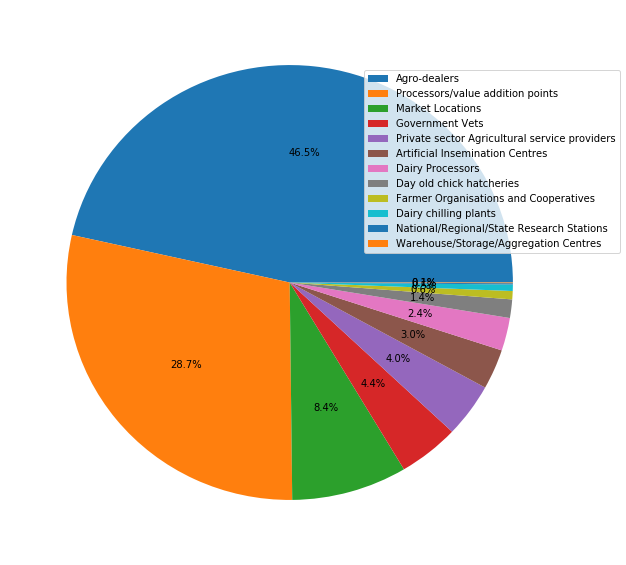

In [6]:
counts = inAgri['type'].value_counts()
labels = counts.index.tolist()
plt.figure(figsize=(10,10))
plt.pie(counts, autopct='%1.1f%%')
plt.legend(labels, loc='upper right',bbox_to_anchor=(1.1, 0.9));

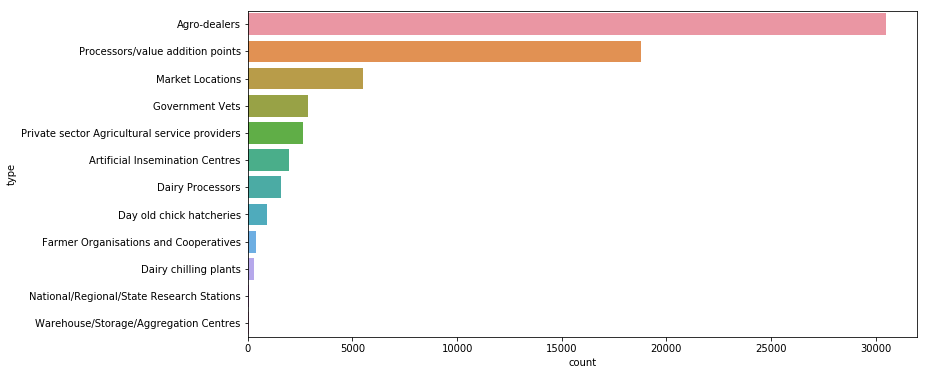

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(y='type',data=inAgri, order=labels);

** Land type: **

In [8]:
inAgri['land_use'].value_counts()

Rural    59608
Urban     5927
Name: land_use, dtype: int64

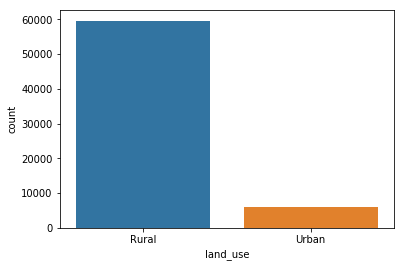

In [9]:
sns.countplot(x='land_use',data=inAgri);

** States: **

In [10]:
inAgri['state'].value_counts()

Uttar Pradesh    54907
Bihar            10628
Name: state, dtype: int64

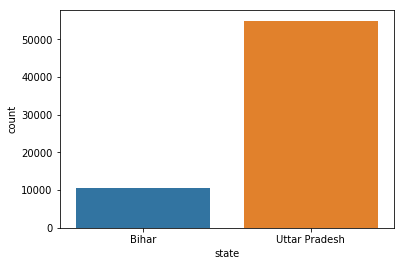

In [11]:
sns.countplot(x='state',data=inAgri);

In [12]:
inAgr_Bihar = inAgri[inAgri['state'] == 'Bihar']
inAgr_Uttar = inAgri[inAgri['state'] == 'Uttar Pradesh']

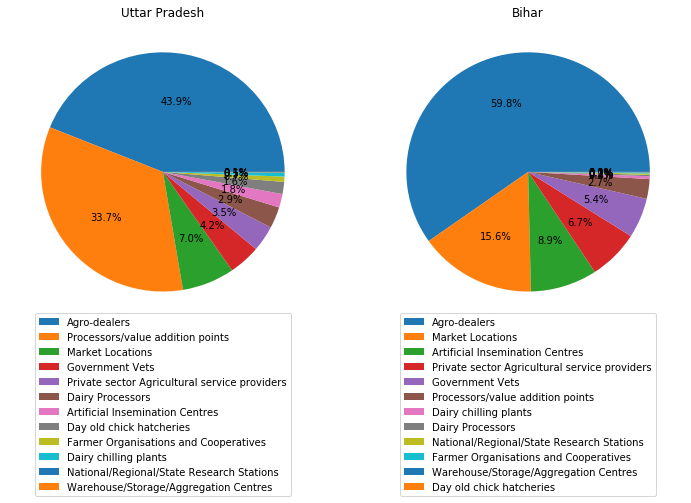

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12,5.5))

counts = inAgr_Uttar['type'].value_counts()
labels = counts.index.tolist()
axes[0].pie(counts, autopct='%1.1f%%')
axes[0].set_title("Uttar Pradesh")
axes[0].legend(labels, loc='lower center', bbox_to_anchor=(0.5, -0.6))

counts = inAgr_Bihar['type'].value_counts()
labels = counts.index.tolist()
axes[1].pie(counts, autopct='%1.1f%%')
axes[1].set_title("Bihar")
axes[1].legend(labels, loc='lower center', bbox_to_anchor=(0.5, -0.6));

### Read and deal with maps

In [14]:
#Import libs
import geopandas as gpd
from iso3166 import countries

** Download India gadm36 shapefiles from [http://www.gadm.org/download](http://www.gadm.org/download) **

In [15]:
#After unzipping map for India, read in file
inmap = gpd.read_file('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/gadm36_IND_shp/gadm36_IND_1.shp')

In [16]:
inmap.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IND,India,IND.1_1,Andaman and Nicobar,Andaman & Nicobar Islands|Andaman et Nicobar|I...,,Union Territor,Union Territory,,IN.AN,"(POLYGON ((93.78772736000001 6.85264015, 93.78..."
1,IND,India,IND.2_1,Andhra Pradesh,,,State,State,,IN.AP,"(POLYGON ((80.19264221 13.52069569, 80.1926422..."
2,IND,India,IND.3_1,Arunachal Pradesh,Agence de la Frontière du Nord-Est(French-obso...,,State,State,,IN.AR,"POLYGON ((94.21111298 27.61084175, 94.21350861..."
3,IND,India,IND.4_1,Assam,,,State,State,,IN.AS,"POLYGON ((89.83874512 25.96647453, 89.8381424 ..."
4,IND,India,IND.5_1,Bihar,,,State,State,,IN.BR,"(POLYGON ((87.26291655999999 27.85071564, 87.2..."


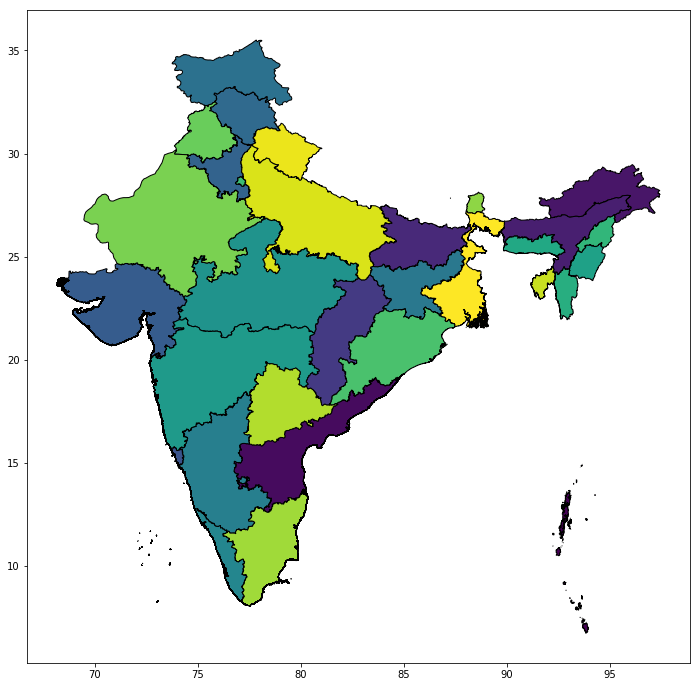

In [17]:
inmap.plot(figsize=(12,12), edgecolor='black', cmap='viridis')

In [18]:
# Get Uttar Pradesh and Bihar states
inmap_state = inmap[(inmap['NAME_1'] == 'Uttar Pradesh') | (inmap['NAME_1'] == 'Bihar')]

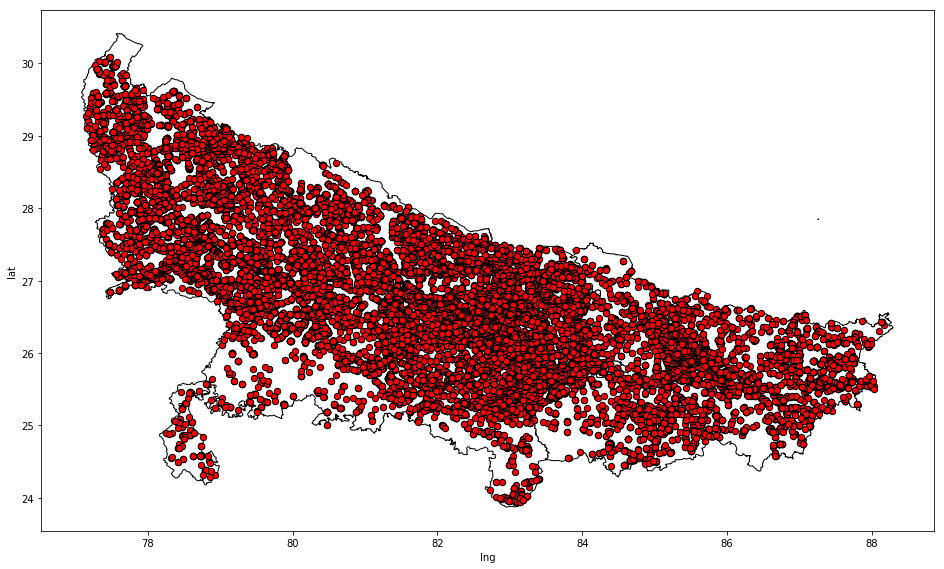

In [19]:
fig, ax = plt.subplots(figsize=[16,16])
ax.set_aspect('equal')

inmap_state.plot(ax=ax, color='white', edgecolor='black')
inAgri[inAgri['type'] == 'Agro-dealers'].plot(ax=ax, x='lng', y='lat', kind='scatter', color='r', edgecolor='k', s=40)

### Rectangular grid
Create a polygon grid using Geopandas

In [20]:
# Shapely for creating polygons
from shapely.geometry import Polygon 

In [21]:
def rectangular_grid(boundary, width, height):
    
    xmin = boundary.bounds.minx[0]
    xmax = boundary.bounds.maxx[0]
    ymin = boundary.bounds.miny[0]
    ymax = boundary.bounds.maxy[0]

    rows = int(np.ceil((ymax-ymin) /  height))
    cols = int(np.ceil((xmax-xmin) / width))

    XleftOrigin = xmin
    XrightOrigin = xmin + width
    YtopOrigin = ymax
    YbottomOrigin = ymax - height
    polygons = []

    for i in range(cols):
        Ytop = YtopOrigin
        Ybottom =YbottomOrigin
        for j in range(rows):
            polygons.append(Polygon([(XleftOrigin, Ytop), (XrightOrigin, Ytop), (XrightOrigin, Ybottom), (XleftOrigin, Ybottom)])) 
            Ytop = Ytop - height
            Ybottom = Ybottom - height
        XleftOrigin = XleftOrigin + width
        XrightOrigin = XrightOrigin + width
        
    # Coordinate reference system : WGS84
    crs = {'init': 'epsg:4326'}
        
    return gpd.GeoDataFrame({'geometry':polygons}, crs=crs)

In [22]:
# The shapely.ops module has a cascaded_union that finds the cumulative union of many objects
from shapely.ops import cascaded_union

boundary = gpd.GeoSeries(cascaded_union(inmap_state['geometry']))

grid = rectangular_grid(boundary, 0.1, 0.1)

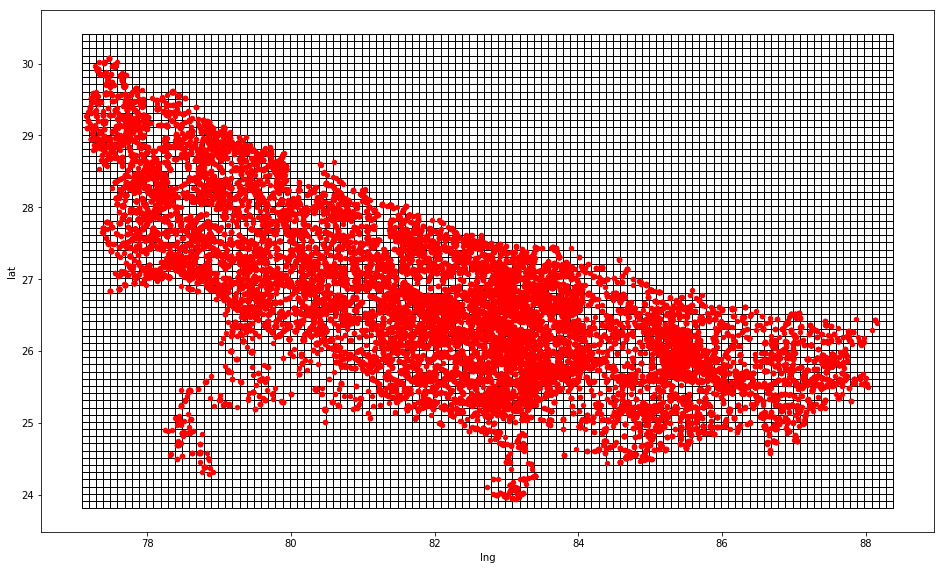

In [23]:
fig, ax = plt.subplots(figsize=(16,16))
ax.set_aspect('equal')

grid.plot(ax=ax, color='white', edgecolor='black')
inAgri[inAgri['type'] == 'Agro-dealers'].plot(ax=ax, x='lng', y='lat', kind='scatter', color='r')

In [ ]:
#new_grid = gpd.overlay(grid, boundary, how='intersection')

### Heat map
Convert latitude/longtitude columns to geometry column 

In [24]:
# Shapely for converting latitude/longtitude to geometry
from shapely.geometry import Point

In [25]:
def lng_lat_to_geo(lng, lat):
    # creating a geometry column 
    geometry = [Point(xy) for xy in zip(lng, lat)]

    # Coordinate reference system : WGS84
    crs = {'init': 'epsg:4326'}

    # Creating a Geographic data frame 
    return gpd.GeoDataFrame(crs=crs, geometry=geometry)

In [26]:
lng = inAgri[inAgri['type'] == 'Agro-dealers']['lng']
lat = inAgri[inAgri['type'] == 'Agro-dealers']['lat']
points = lng_lat_to_geo(lng,lat)
points.head()

,geometry
0,POINT (84.67435999999999 25.56872)
1,POINT (81.23368000000001 26.22088)
2,POINT (81.17151 26.12233)
3,POINT (80.06865999999999 27.41452)
4,POINT (79.99354 27.40183)


In [27]:
grid.head()

,geometry
0,"POLYGON ((77.08490753 30.41245842, 77.18490752..."
1,"POLYGON ((77.08490753 30.31245842, 77.18490752..."
2,"POLYGON ((77.08490753 30.21245842, 77.18490752..."
3,"POLYGON ((77.08490753 30.11245842, 77.18490752..."
4,"POLYGON ((77.08490753 30.01245841999999, 77.18..."


In [28]:
def count_the_points(grid, points):
    g = grid.copy()
    p = points.copy()
    
    joined = gpd.tools.sjoin(g, p)
    joined.drop('index_right',axis=1,inplace=True)
    point_counts = joined.groupby(joined.index).agg('count')
    point_counts.rename(columns={"geometry": "count"}, inplace=True)
    
    grid = g.merge(point_counts, how='left', left_index=True, right_index=True)
    
    return grid

In [29]:
density = count_the_points(grid, points)
density.head()

,geometry,count
index_left,,
0,"POLYGON ((77.08490753 30.41245842, 77.18490752...",NaN
1,"POLYGON ((77.08490753 30.31245842, 77.18490752...",NaN
2,"POLYGON ((77.08490753 30.21245842, 77.18490752...",NaN
3,"POLYGON ((77.08490753 30.11245842, 77.18490752...",NaN
4,"POLYGON ((77.08490753 30.01245841999999, 77.18...",NaN


/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


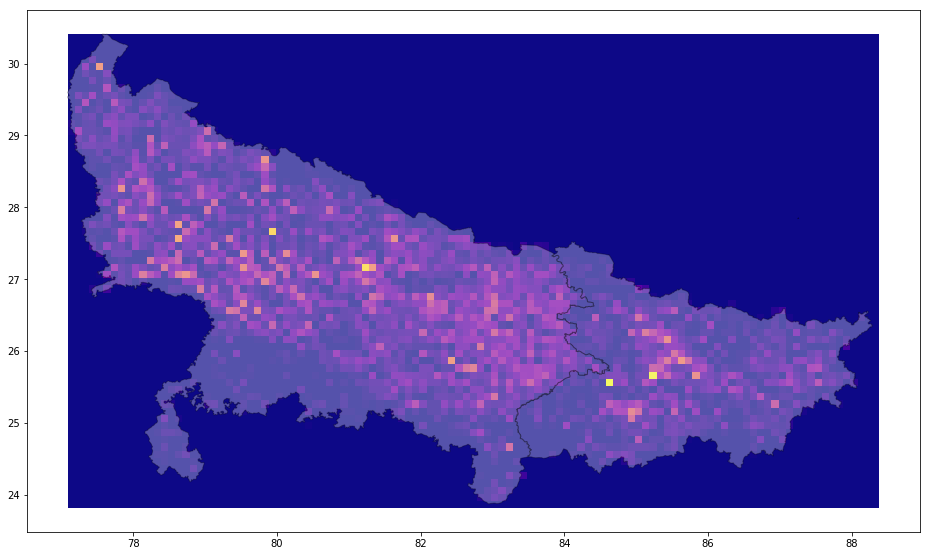

In [30]:
fig, ax = plt.subplots(figsize=[16,16])
ax.set_aspect('equal')

density.plot(ax=ax, column="count", cmap='plasma')
inmap_state.plot(ax=ax, color='white', edgecolor='black', alpha=0.3)

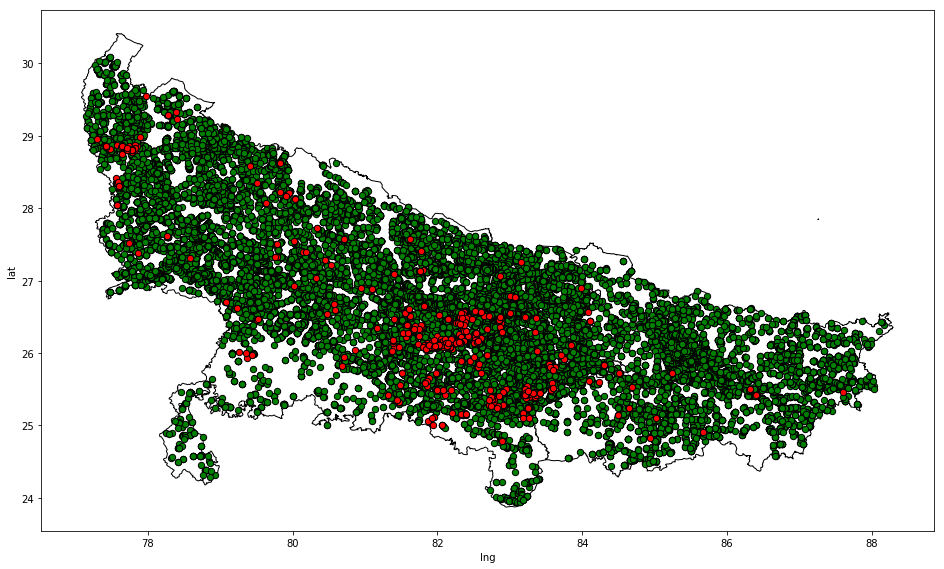

In [31]:
fig, ax = plt.subplots(figsize=[16,16])
ax.set_aspect('equal')

inmap_state.plot(ax=ax, color='white', edgecolor='black')
inAgri[inAgri['type'] == 'Agro-dealers'].plot(ax=ax, x='lng', y='lat', kind='scatter', color='g', edgecolor='k', s=40)
inAgri[inAgri['type'] == 'Farmer Organisations and Cooperatives'].plot(ax=ax, x='lng', y='lat', kind='scatter', color='r', edgecolor='k', s=40)

/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


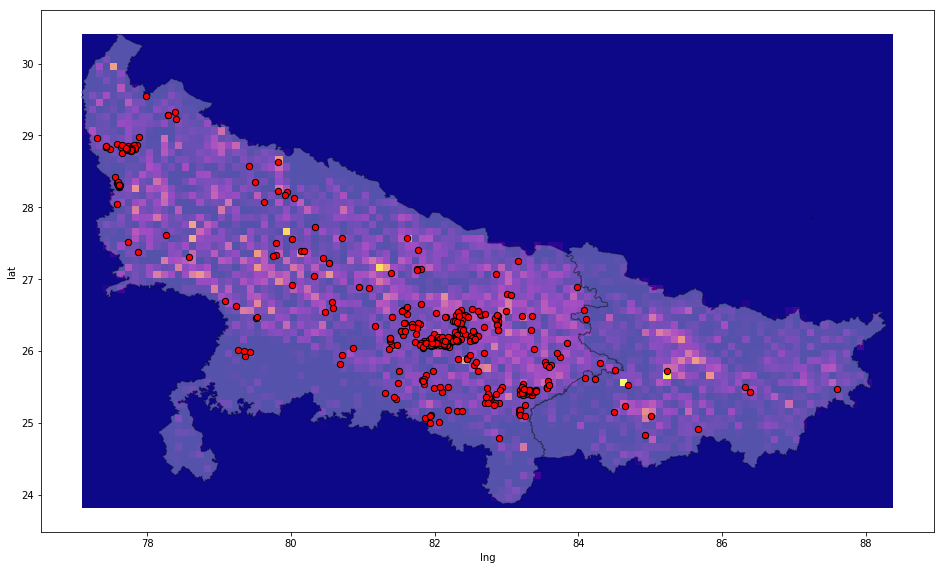

In [32]:
fig, ax = plt.subplots(figsize=[16,16])
ax.set_aspect('equal')

density.plot(ax=ax, column="count", cmap='plasma')
inmap_state.plot(ax=ax, color='white', edgecolor='black', alpha=0.3)
inAgri[inAgri['type'] == 'Farmer Organisations and Cooperatives'].plot(ax=ax, x='lng', y='lat', kind='scatter', color='r', edgecolor='k', s=40)

## Kenya 2015
### Agriculture

In [33]:
kenAgri = pd.read_excel('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/FSP_Maps/Agriculture/kenya_agriculture_2015.xls')

In [34]:
kenAgri.head(1)

,submission_id,form_name,form_created,form_submitted,province,county,constituency,ward,lat,long,gps_accuracy,type,ag_dealer_name,ag_dealer_operational,ag_dealer_num_employees,ex_post_operational,ex_post_contact_num,ex_post_num_employees
0,1433841551991_Stellan,Agriculture,2015-06-09,2015-06-09,NYANZA,HOMA BAY,SUBA SOUTH,GWASSI SOUTH,-0.76614,34.07594,9,Farmer Organisations And Cooperatives,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
kenAgri['type'].unique()

array(['Farmer Organisations And Cooperatives', 'Agro-Dealers',
       'Extension Posts/Offices', 'Government And Private Vets',
       'Artificial Insemination Centres',
       'Seed Multipliers/Seed Companies',
       'Private Sector Agricultural Service Providers',
       'Warehouse/Storage/Aggregation Centres/Collection Centres',
       'Market Locations', 'Abattoirs/ Slaughter Houses', 'Cattle Dips',
       'Processors/Value Addition Points', 'Day Old Chick Hatcheries',
       'Dairy Chilling Plants', 'Fish Landing Sites', 'Dairy Processors',
       'Fish Hatcheries', 'National/Regional/State Research Stations',
       'Ranches'], dtype=object)

Download Kenia gadm36 shapefiles from http://www.gadm.org/download

In [36]:
#After unzipping map for Kenya, read in file
kenmap = gpd.read_file('/Users/ikersanchez/Vizzuality/PROIEKTUAK/i2i/Data/gadm36_KEN_shp/gadm36_KEN_1.shp')

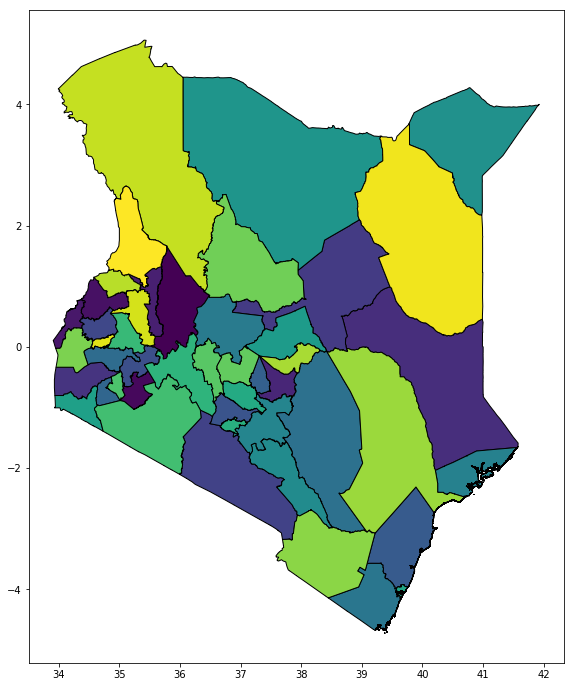

In [37]:
kenmap.plot(figsize=(12,12), edgecolor='black', cmap='viridis')

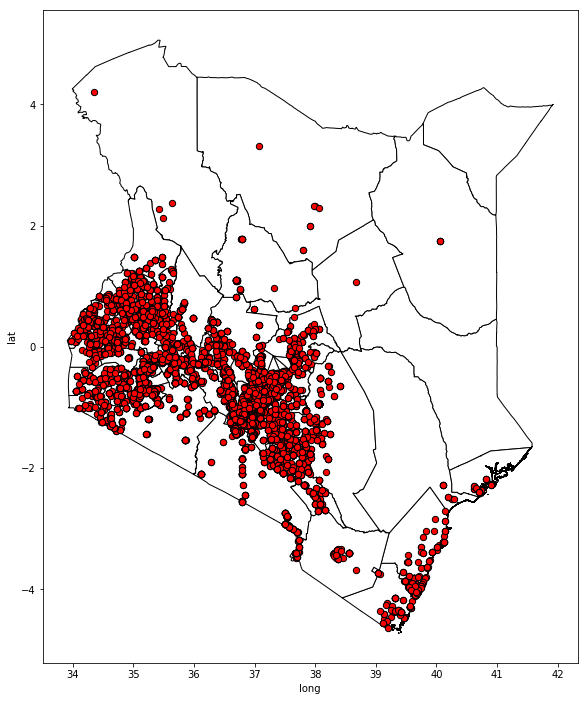

In [38]:
fig, ax = plt.subplots(figsize=[12,12])
ax.set_aspect('equal')

kenmap.plot(ax=ax, color='white', edgecolor='black')
kenAgri[kenAgri['type'] == 'Agro-Dealers'].plot(ax=ax, x='long', y='lat', kind='scatter', color='r', edgecolor='k', s=40)

### Voronoi tessellation
Built a Voronoi tessellation from points

In [39]:
from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import LineString
# The shapely.ops module has a polygonize that returns a generator for Shapely Polygon objects.
from shapely.ops import polygonize

In [40]:
def voronoi_tessellation(long,lat):
    points = np.zeros((long.shape[0],2))
    points[:,0] = long
    points[:,1] = lat
    
    vor = Voronoi(points)
    
    #build a collection of Shapely LineString objects
    lines = [
        LineString(vor.vertices[line])
        for line in vor.ridge_vertices
        if -1 not in line
    ]
    
    voronoid = []
    for poly in polygonize(lines):
        voronoid.append(poly)
    
    voronoid = gpd.GeoDataFrame(voronoid)
    voronoid.rename(columns={0: "geometry"}, inplace=True)
    
    return voronoid

In [41]:
long = kenAgri[kenAgri['type'] == 'Agro-Dealers']['long']
lat = kenAgri[kenAgri['type'] == 'Agro-Dealers']['lat']

voronoid = voronoi_tessellation(long, lat)

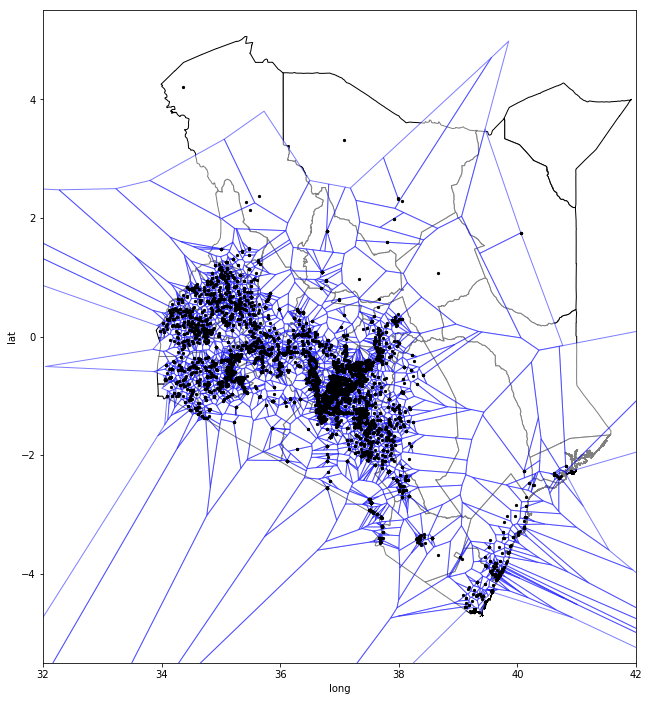

In [42]:
fig, ax = plt.subplots(figsize=[12,12])
ax.set_aspect('equal')

kenmap.plot(ax=ax, color='white', edgecolor='black')
voronoid.plot(ax=ax, color='white', edgecolor='blue', alpha=0.5)
kenAgri[kenAgri['type'] == 'Agro-Dealers'].plot(ax=ax, x='long', y='lat', kind='scatter', color='k', s=5)

ax.set_xlim(32,42)
ax.set_ylim(-5.5,5.5);

Get the boundary of Kenya

In [43]:
# The shapely.ops module has a cascaded_union that finds the cumulative union of many objects
from shapely.ops import cascaded_union

In [44]:
boundary = gpd.GeoSeries(cascaded_union(kenmap['geometry']))

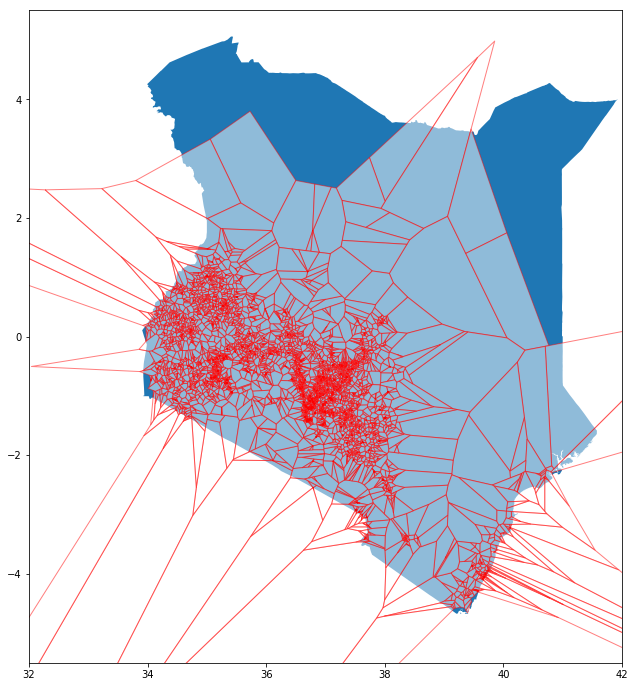

In [45]:
fig, ax = plt.subplots(figsize=[12,12])
ax.set_aspect('equal')

boundary.plot(ax=ax)
voronoid.plot(ax=ax, color='white', edgecolor='red', alpha=0.5)

ax.set_xlim(32,42)
ax.set_ylim(-5.5,5.5);

In [46]:
boundary = gpd.GeoDataFrame(boundary).rename(columns={0: 'geometry'})
boundary.head()

,geometry
0,"(POLYGON ((39.37625122 -4.71569395, 39.3762512..."


In [47]:
voronoid = gpd.overlay(voronoid, boundary, how='intersection')

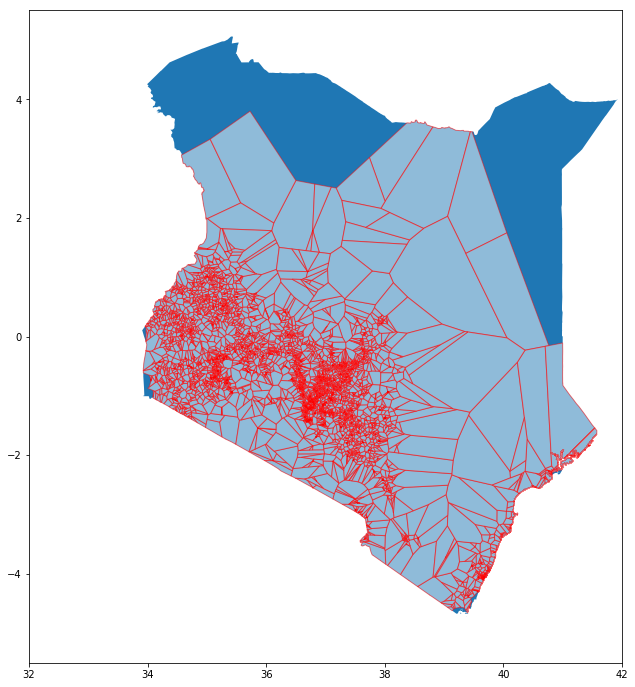

In [146]:
fig, ax = plt.subplots(figsize=[12,12])
ax.set_aspect('equal')

boundary.plot(ax=ax)
voronoid.plot(ax=ax, color='white', edgecolor='red', alpha=0.5)

ax.set_xlim(32,42)
ax.set_ylim(-5.5,5.5);

In [147]:
print(voronoid.crs)

{'init': 'epsg:4326'}


### Nearest neighbour distance map

In [49]:
from scipy.spatial import cKDTree

In [50]:
def distances_map_cKDTree(boundary, pixel_size, points):
    
    xmin = int(np.floor(boundary.bounds.minx[0]))
    xmax = int(np.ceil(boundary.bounds.maxx[0]))
    ymin = int(np.floor(boundary.bounds.miny[0]))
    ymax = int(np.ceil(boundary.bounds.maxy[0]))
    
    x = np.linspace(xmin, xmax, int((xmax-xmin)/pixel_size)+1)
    y = np.linspace(ymin, ymax, int((ymax-ymin)/pixel_size)+1)
    
    tree = cKDTree(points)
    
    image = np.zeros((len(y),len(x)))
    
    for i in range(len(x)):
        for j in range(len(y)):
            image[j,i] = tree.query([x[i],y[j]])[0]
    return image

In [51]:
long = kenAgri[kenAgri['type'] == 'Agro-Dealers']['long']
lat = kenAgri[kenAgri['type'] == 'Agro-Dealers']['lat']

points = np.zeros((long.shape[0],2))
points[:,0] = long
points[:,1] = lat

In [52]:
image = distances_map_cKDTree(boundary, 0.1, points)

In [53]:
from scipy.spatial.distance import cdist

In [54]:
def distances_map(boundary, pixel_size, points):
    
    xmin = int(np.floor(boundary.bounds.minx[0]))
    xmax = int(np.ceil(boundary.bounds.maxx[0]))
    ymin = int(np.floor(boundary.bounds.miny[0]))
    ymax = int(np.ceil(boundary.bounds.maxy[0]))
    
    x = np.linspace(xmin, xmax, int((xmax-xmin)/pixel_size)+1)
    y = np.linspace(ymin, ymax, int((ymax-ymin)/pixel_size)+1)
    
    image = np.zeros((len(y),len(x)))
    
    for i in range(len(x)):
        for j in range(len(y)):
            image[j,i] = np.min(cdist(np.array([[x[i],y[j]]]), points))
    return image

In [55]:
#image = distances_map(boundary, 0.1, points)

xmin = int(np.floor(boundary.bounds.minx[0]))
xmax = int(np.ceil(boundary.bounds.maxx[0]))
ymin = int(np.floor(boundary.bounds.miny[0]))
ymax = int(np.ceil(boundary.bounds.maxy[0]))

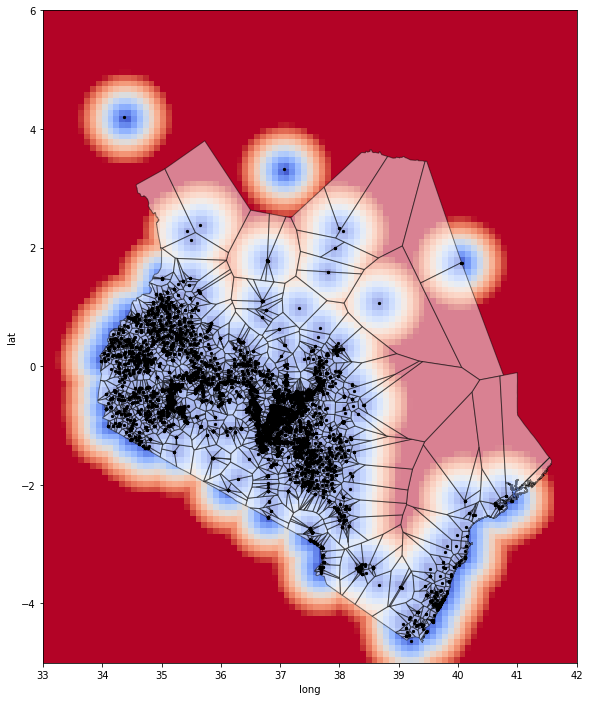

In [152]:
fig, ax = plt.subplots(figsize=[12,12])

ax.imshow(image, origin = 'lower', extent=[xmin,xmax,ymin,ymax], vmax=0.8, cmap='coolwarm')
voronoid.plot(ax=ax, color='white', edgecolor='k', alpha=0.5)
kenAgri[kenAgri['type'] == 'Agro-Dealers'].plot(ax=ax, x='long', y='lat', kind='scatter', color='k', s=5)

#ax.set_xlim(35,40)
#ax.set_ylim(-2,2);

### Saving raster data
We use raterio to save the grid as a GeoTIFF file

In [153]:
import rasterio

To save the coordinates we use the `from_origin` function in the `rasterio.transform` module.

Note, in the from_origin() method, west should be a value from -180 to 180 (not 0-360).

In [154]:
pixel_size = 0.1
west = int(np.floor(boundary.bounds.minx[0])) - pixel_size/2
north = int(np.ceil(boundary.bounds.maxy[0])) - pixel_size/2

trans = rasterio.transform.from_origin(west, north, pixel_size, pixel_size)
trans

Affine(0.1, 0.0, 32.95,
       0.0, -0.1, 5.95)

To save the array along with georeferencing information to a new raster data file, call `rasterio.open()` with a path to the new file to be created, `'w'` to specify writing mode, and several keyword arguments.

In [155]:
dataset = rasterio.open('dataset.tif', 'w', driver='GTiff',
                        height=image.shape[0], width=image.shape[1],
                        count=1, dtype='float64',
                        crs='EPSG:4326', transform=trans)

Reverse the order of elements along the y-axis

In [156]:
image = np.flip(image,axis=0)

To save the grid, call the new dataset’s `write()` method with the grid and target band number as arguments.

In [157]:
dataset.write(image, 1)

and then call the `close()` method to sync data to disk and finish.

In [158]:
dataset.close()

In [159]:
with rasterio.open('dataset.tif') as dataset:
    myData=dataset.read(1)
    profile=dataset.crs
    print(dataset.bounds)
    print(dataset.width)
    print(dataset.height)

BoundingBox(left=32.95, bottom=-5.150000000000001, right=42.050000000000004, top=5.95)
91
111


### Zonal statistics

In [160]:
from rasterstats import zonal_stats

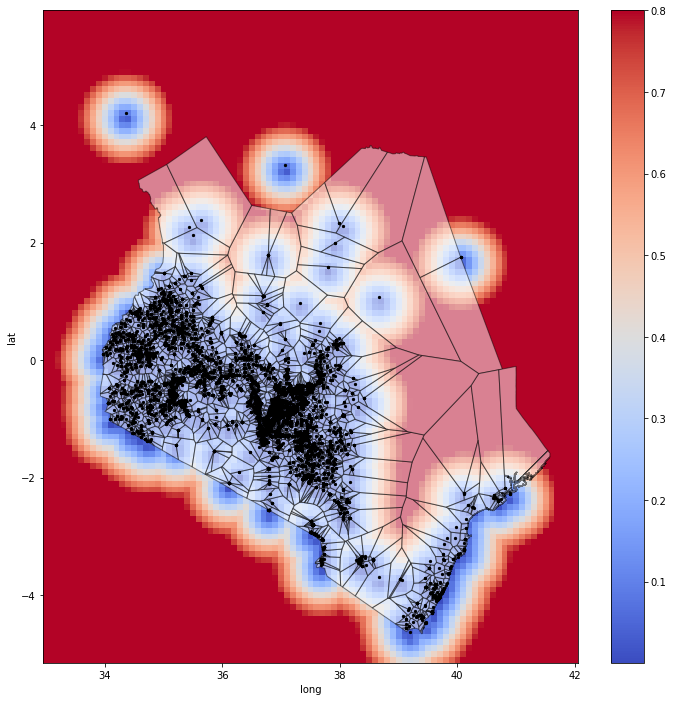

In [162]:
fig, ax = plt.subplots(figsize=[12,12])

im = ax.imshow(myData, extent=[dataset.bounds[0],dataset.bounds[2],dataset.bounds[1],dataset.bounds[3]], vmax=0.8, cmap='coolwarm')
#boundary.plot(ax=ax, color='white', edgecolor='black', alpha=0.3)
voronoid.plot(ax=ax, color='white', edgecolor='k', alpha=0.5)
kenAgri[kenAgri['type'] == 'Agro-Dealers'].plot(ax=ax, x='long', y='lat', kind='scatter', color='k', s=5)

#ax.set_xlim(38,42)
#ax.set_ylim(-5,-2)
fig.colorbar(im, ax=ax)

In [163]:
zs = zonal_stats(voronoid, 'dataset.tif',  all_touched=True)

/anaconda3/lib/python3.6/site-packages/rasterstats/main.py:145: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  with Raster(raster, affine, nodata, band) as rast:
/anaconda3/lib/python3.6/site-packages/rasterstats/io.py:242: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  self.affine = guard_transform(self.src.transform)
/anaconda3/lib/python3.6/site-packages/rasterstats/io.py:294: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/anaconda3/lib/python3.6/site-packages/rasterstats/main.py:165: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  np.issubdtype(fsrc.array.dtype, float)


In [164]:
zs = gpd.GeoDataFrame(zs)

In [165]:
voronoid_zs = voronoid.join(zs)

In [170]:
voronoid_zs.head()

,geometry,count,max,mean,min
0,POLYGON ((34.10865640024796 0.3800551610131093...,1,0.055224,0.055224,0.055224
1,POLYGON ((37.74268517549793 0.3750544406686065...,7,0.158296,0.101720,0.024922
2,POLYGON ((37.76050196848355 0.3849534363501901...,15,0.313461,0.153789,0.041781
3,POLYGON ((34.33044929412921 0.3729666750347833...,4,0.045414,0.028541,0.007772
4,POLYGON ((34.35488890811187 0.3918188211754384...,2,0.045414,0.038888,0.032362


In [171]:
voronoid_zs.to_file(driver='ESRI Shapefile',filename='voronoid.shp')

In [178]:
import matplotlib as mpl
import matplotlib.cm as cm

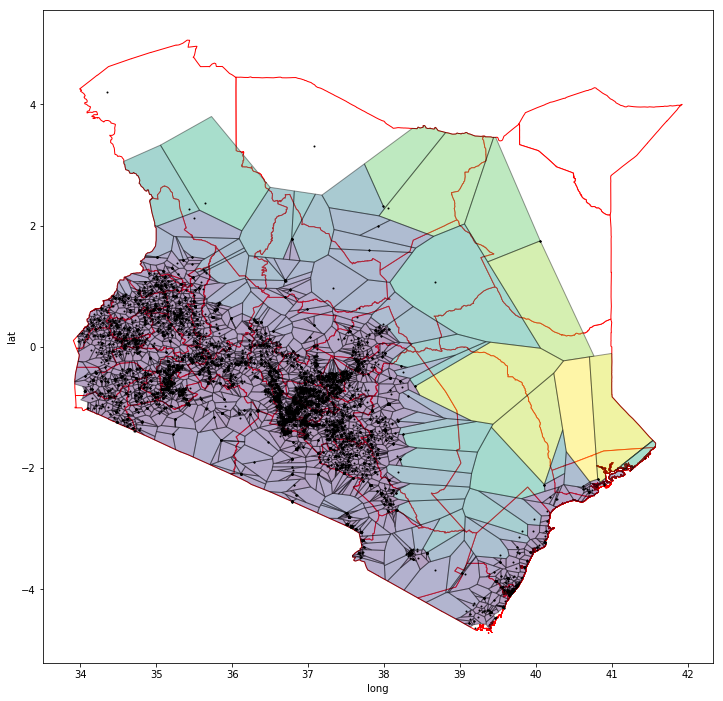

In [190]:
# find min/max values for normalization
minima = voronoid_zs['mean'].min()
maxima = voronoid_zs['mean'].max()

# normalize chosen colormap
norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis)

fig, ax = plt.subplots(figsize=[12,12])

kenmap.plot(ax=ax, color='white', edgecolor='r')

for i in range(len(voronoid_zs)):
    polygon = voronoid_zs['geometry'].iloc[i]
    x, y = polygon.exterior.coords.xy
    ax.fill(x, y, facecolor=mapper.to_rgba(voronoid_zs['mean'].iloc[i]), edgecolor='k', zorder=1, alpha=0.4)
    
#voronoid.plot(ax=ax, color='white', edgecolor=0.5, alpha=0.5, zorder=2)
kenAgri[kenAgri['type'] == 'Agro-Dealers'].plot(ax=ax, x='long', y='lat', kind='scatter', color='k', s=1, zorder=2)